# Linear Regression

## Housing Price Prediction

Given a dataset with 4 features (size, bedrooms, floors and age)

Build a linear regression model to predict the price for other houses

### Packages

In [106]:
import numpy as np 
import matplotlib.pyplot as plt
from utils import *

### Dataset

In [107]:
#load data
X_train, y_train = load_house_data()
X_train = add_intercept(X_train)

In [108]:
print(type(X_train))
print(X_train.shape)
print(X_train[:5])

<class 'numpy.ndarray'>
(99, 5)
[[1.000e+00 1.244e+03 3.000e+00 1.000e+00 6.400e+01]
 [1.000e+00 1.947e+03 3.000e+00 2.000e+00 1.700e+01]
 [1.000e+00 1.725e+03 3.000e+00 2.000e+00 4.200e+01]
 [1.000e+00 1.959e+03 3.000e+00 2.000e+00 1.500e+01]
 [1.000e+00 1.314e+03 2.000e+00 1.000e+00 1.400e+01]]


In [109]:
print(type(y_train))
print(y_train.shape)
print(y_train[:5])

<class 'numpy.ndarray'>
(99,)
[300.  509.8 394.  540.  415. ]


### Visualize Data

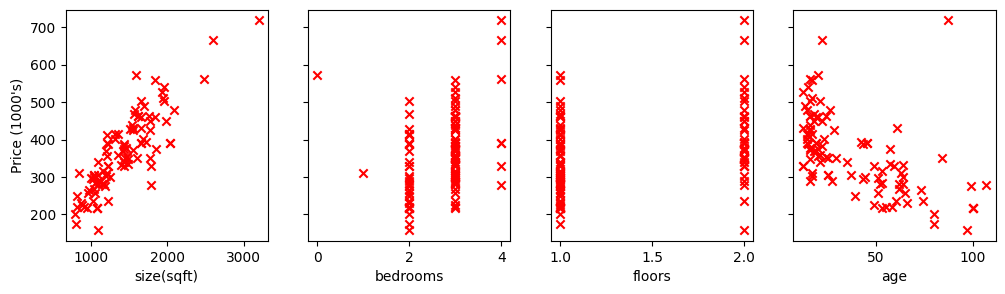

In [110]:
X_features = ['intercept', 'size(sqft)', 'bedrooms', 'floors', 'age']

fig, ax = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:, i+1], y_train, marker='x', c='r')
    ax[i].set_xlabel(X_features[i+1])
ax[0].set_ylabel("Price (1000's)")
plt.show()

### Feature Scaling

#### z-score normalization

$$ x_j^{(i)} = \frac{x_j^{(i)} - \mu_j}{\sigma_j} $$
where
\begin{align*}
    \mu_j &= \frac{1}{m} \sum_{i=0}^{n-1}x_j^{(i)} \\
    \sigma_j^2 &= \frac{1}{m} \sum_{i=0}^{n-1}(x_j^{(i)} - \mu_j)^2
\end{align*}

In [111]:
def zscore_normalize(X, cols):
    """
    computes zscore normalized X with selected columns

    Arg:
        X (ndarray(n, d))   : feature matrix, n examples, d features
        cols (list)         : columns needed to normalize
    Returns:
        X_norm (ndarray(m, n))  : zscore normlized feature matrix with selected columns
        mu (list)               : mean of all values for each feature
        sigma (list)            : standard deviation of each feature
    """
    X_norm = X.copy()
    mu = [0] * X.shape[1]
    sigma = [1] * X.shape[1]

    for i in cols:
        mu[i] = np.mean(X[:, i], axis=0)
        sigma[i] = np.std(X[:, i], axis=0)
        X_norm[:, i] = (X[:, i] - mu[i]) / sigma[i]
    
    return X_norm, mu, sigma

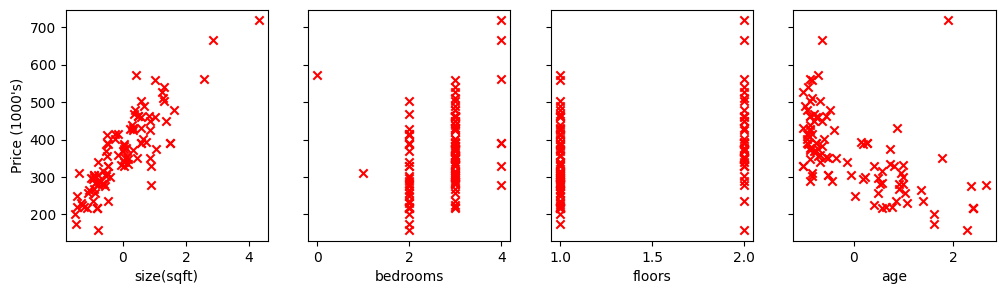

In [112]:
cols_norm = [1, 4]
X_norm, mu, sigma = zscore_normalize(X_train, cols_norm)

fig, ax = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range((len(ax))):
    ax[i].scatter(X_norm[:, i+1], y_train, marker='x', c='r')
    ax[i].set_xlabel(X_features[i+1])
ax[0].set_ylabel("Price (1000's)")
plt.show()

### Linear Regression Model

$$ h_\theta(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... = \sum_{i=0}^d \theta^T x $$

In [113]:
def predict(x, theta):
    """
    predicts

    Args:
        x (ndarray(d+1,)): an input variable
    Returns:
        h (scalar): prediction for x
    """
    h = np.dot(theta, x)
    return h

#### Cost Function

$$ J(\theta) = \frac{1}{2} \sum_{i=0}^{n-1}(h_\theta(x^{(i)}) - y^{(i)})^2 $$

In [114]:
def compute_cost(X, y, theta):
    """
    computes cost

    Args:
        X (ndarray(n, d+1))     : feature matrix with intercept added, n examples, d features
        y (ndarray(n,))         : target values
        theta (ndarray(d+1,))   : parameters
    Returns:
        cost (scalar): cost
    """
    cost = 0.0

    n = X.shape[0]
    for i in range(n):
        cost = cost + (np.dot(theta, X[i]) - y[i])**2

    cost = cost / 2
    return cost

#### Gradient Descent

$$ \frac{\partial J(\theta)}{\partial \theta} = \sum_{i=0}^{n-1} (h_\theta(x^{(i)}) - y^{(i)})x^{(i)} $$

In [115]:
def compute_gradient(X, y, theta):
    """ 
    Computes the gradient for linear regression

    Args:
        X (ndarray(n, d+1))     : matrix of examples
        y (ndarray(n,))         : target values
        theta (ndarray(d+1,))   : parameters
    Returns:
        gd (ndarray(d+1,))   : gradient of J w.r.t theta
    """
    n, d = X.shape
    gd = np.zeros((d,))

    for i in range(n):
        err = np.dot(theta, X[i]) - y[i]
        for j in range(d):
            gd[j] = gd[j] + err * X[i, j]
    
    return gd

##### Batch Gradient Descent


\begin{align*}
& \text{repeat until convergence:} \; \lbrace \\ 
& \phantom{0000} \theta := \theta + \alpha \sum_{i=0}^{n-1}(y^{(i)} - h_\theta(x^{(i)}))x^{(i)} \\
& \rbrace
\end{align*}

In [116]:
def gradient_descent(X, y, alpha, num_iters=10000):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray(n, d+1))   : matrix of examples 
      y (ndarray(n,))       : target value of each example
      alpha (float)         : learning rate
      num_iters (int)       : number of iterations to run gradient descent
    Returns
      theta (ndarray(d+1,)) : updated values of parameters of the model after
                            running gradient descent
    """
    
    n, d = X.shape
    
    theta = np.zeros((d,))

    for i in range(num_iters):
        gd = compute_gradient(X, y, theta)
        theta = theta - alpha * gd

    return theta


In [122]:
alpha = 1.0e-7

theta = gradient_descent(X_train, y_train, alpha, 10000)

print(theta)

C:\Users\hungb\AppData\Local\Temp\ipykernel_2176\1545525927.py:18: RuntimeWarning: overflow encountered in scalar add
  gd[j] = gd[j] + err * X[i, j]
C:\Users\hungb\AppData\Local\Temp\ipykernel_2176\1545525927.py:18: RuntimeWarning: invalid value encountered in scalar multiply
  gd[j] = gd[j] + err * X[i, j]
C:\Users\hungb\AppData\Local\Temp\ipykernel_2176\1078109951.py:22: RuntimeWarning: invalid value encountered in subtract
  theta = theta - alpha * gd


[nan nan nan nan nan]
